# preparation

In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime
sns.set()

data = pd.read_csv("data_ac_images224.csv", sep='\t')

## __Texte__ traitement

### stopword : sw

#### Affichage Fréquence mots

1050 descriptions de produits


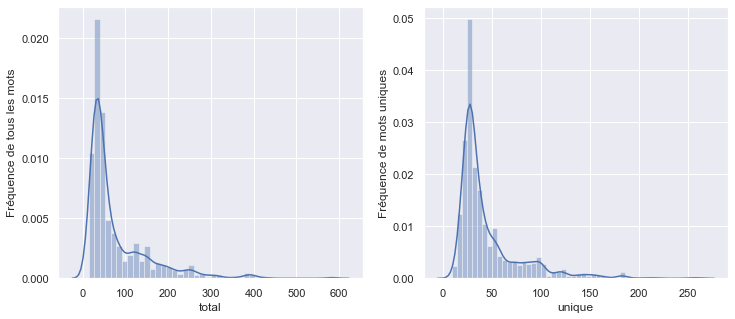

In [ ]:
text = "description"

from collections import defaultdict

corpus_brut = defaultdict(set)

for index, row in data.iterrows():
    corpus_brut[index].add(row[text])
    
print(len(corpus_brut), "descriptions de produits")


import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')

def stats_freq(coro) : 
    stats, freq = dict(), dict()
    for k, v in coro.items():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v),  'unique': len(fq.keys())}
    return (freq, stats)


def freq_stats_corpus(corpus_brut):
    corpus = defaultdict(list)
    
    # Création d'un corpus de tokens par objets_etude
    
    for objets_etude,document_ids in corpus_brut.items():
        for document in document_ids:
            corpus[objets_etude] += tokenizer.tokenize( document.lower())

    freq, stats = stats_freq(corpus)
        
    return (freq, stats, corpus)

def plot_frequence(freq, stats):
    # Affichage des fréquences
    df = pd.DataFrame.from_dict(stats, orient='index')
    df.sort_values(by='total', ascending=False)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(df["total"],ax = axs[0] )
    axs[0].set_ylabel("Fréquence de tous les mots")

    sns.distplot(df["unique"],ax = axs[1] )
    axs[1].set_ylabel("Fréquence de mots uniques")

# Récupération des comptages
freq, stats, corpus = freq_stats_corpus(corpus_brut)
    
plot_frequence(freq, stats)

#### Calcul des 40 mots les + fréquents

In [ ]:
# suprimme un nb de mots les plus fréquents : threshold_sw
freq,stats  = stats_freq(corpus)   

threshold_sw  = 40
freq_totale = nltk.Counter()
for k, v in corpus.items():
    freq_totale += freq[k]
most_freq = list(zip(*freq_totale.most_common(threshold_sw)))[0]  
print(most_freq)


('of', 'for', 'the', 'and', 'to', 'in', 'rs', 'only', 'with', 'on', 'at', 'a', 'your', 'is', 'products', 'free', 'buy', 'delivery', 'genuine', 'shipping', 'cash', 'replacement', '1', 'cm', 'day', '30', 'flipkart', 'com', 'guarantee', 'this', 'it', 'online', 'features', 'from', 'specifications', 's', 'you', 'price', 'watch', 'color')


#### Ajoute les stopwords basiques

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# ajoute les stopwords de la library ntkl
sw = set()
default = stopwords.words('english')
sw.update(most_freq)
sw.update(tuple(default))
print(sw, "\n \n nb de stopwords : ", len(sw))


{'cash', "wasn't", 't', 'features', 'our', 'of', "it's", 'why', 'own', 'those', 'other', 'from', 'who', 'buy', 'as', 'ma', 'been', "you're", 'more', 'which', "didn't", 'mustn', 'itself', 'an', 'against', 'they', 'nor', "haven't", 'out', 'just', 'it', 'yourself', 'rs', 'haven', 'aren', 'needn', 'com', 'o', 'so', 'them', 'there', 'over', 'same', 'do', 'does', 'where', "isn't", 'its', 'because', 'until', 'up', 'day', 'through', 'before', "mightn't", 'most', 'should', 'off', 'how', 'products', 'too', 'theirs', 'is', 'himself', 'he', "you'll", 'don', 'than', 'a', 'now', 'we', 'shouldn', 'didn', 'to', 'll', 'guarantee', 'wasn', "hasn't", 'down', 'wouldn', 'if', 'ours', 'here', 'that', 'this', 'below', 'hasn', 'watch', "that'll", "mustn't", 'their', 'such', 'into', 'when', 'free', 'your', "wouldn't", 'between', 'genuine', 'yours', "shan't", 'doing', 'at', '30', 'about', "won't", 'being', "hadn't", 'all', 'won', 'doesn', 'were', "should've", 'couldn', 'themselves', 'no', 'have', 'him', 'cm', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocessing text

In [ ]:
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()
import re

import nltk

def my_cool_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
#     text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)
 

In [ ]:
# my_cool_preprocessor(data.loc[0,"description"])
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain."]


In [ ]:
corpus[0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain.'

In [ ]:
my_cool_preprocessor(corpus[0])

'key featur of eleg polyest multicolor abstract eyelet door curtain floral curtain '

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names()), vectorizer.get_feature_names())

11 ['abstract', 'curtain', 'door', 'elegance', 'eyelet', 'features', 'floral', 'key', 'multicolor', 'of', 'polyester']


In [ ]:
vectorizer = CountVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw)
X = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names()), vectorizer.get_feature_names())

10 ['abstract', 'curtain', 'door', 'eleg', 'eyelet', 'featur', 'floral', 'key', 'multicolor', 'polyest']


C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### Le bag of words

In [ ]:
vectorizer = CountVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw)
X = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names()), vectorizer.get_feature_names())

10 ['abstract', 'curtain', 'door', 'eleg', 'eyelet', 'featur', 'floral', 'key', 'multicolor', 'polyest']


In [ ]:
vectorizer_bigram = CountVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, ngram_range = (1,2))
X = vectorizer_bigram.fit_transform(corpus)
print(len(vectorizer_bigram.get_feature_names()), vectorizer_bigram.get_feature_names())

20 ['abstract', 'abstract eyelet', 'curtain', 'curtain floral', 'door', 'door curtain', 'eleg', 'eleg polyest', 'eyelet', 'eyelet door', 'featur', 'featur eleg', 'floral', 'floral curtain', 'key', 'key featur', 'multicolor', 'multicolor abstract', 'polyest', 'polyest multicolor']


## images traitements

In [ ]:
def to_list_images(df):
    prefixe = "Images/"+ df
    return(prefixe.to_list())

images_adress = to_list_images(data["image"])


In [ ]:


from PIL import Image


import cv2

img_pre = []
k=0
for image in images_adress : 
    img      = Image.open(image)
    img_rs      = img.resize((224,224),Image.ANTIALIAS)
    dst = cv2.fastNlMeansDenoisingColored(np.array(img_rs),None,10,10,7,21)
    img_dst = Image.fromarray(dst)
    img_nb   =  img_dst.convert('F')
#     img      = Image.open(image)
#     dst = cv2.fastNlMeansDenoisingColored(np.array(img),None,10,10,7,21)
#     img_dst = Image.fromarray(dst)
#     img_nb   =  img_dst.convert('LA')
#     img_rs      = img_nb.resize((224,224),Image.ANTIALIAS)
    img_pre.append(img_nb)
    if k%10 == 0 : print( k )
    k+=1
# print(np.shape(img_pre), np.shape(img_pre)[0])

# plt.subplot(131 ),plt.imshow(img)
# plt.subplot(132 ),plt.imshow(img_nb)
# plt.subplot(133),plt.imshow(dst)
# plt.show()


In [ ]:
img_pre_arr = []
for img in img_pre : 
    img_pre_arr.append(np.array(img))
np.shape(img_pre_arr)

In [ ]:
img_pre_arr_load = np.load('img224.npy')
test = []
for img in img_pre_arr_load : 
    test.append(img)
np.shape(test)
data["img224"] = test


# split data train & test

## répartition des données

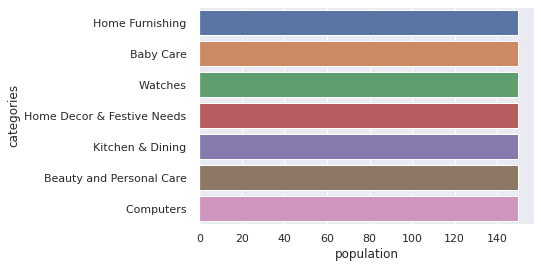

In [ ]:
categs = data["Cat_0"].unique()
repartition = []
for categ in categs : 
    
    
    repartition.append( [categ,data.loc[ data["Cat_0"]==categ]["Cat_0"].shape[0]])
df = pd.DataFrame(repartition, columns = ["categories", "population"])
sns.barplot(x="population", y = "categories" ,   data=df)

## split data train & test

### Definition data (X) + target (y)

In [ ]:
from sklearn.model_selection import train_test_split

corpus_col = "description"

numerical_features = []
categorical_features = [corpus_col]


X = data[numerical_features + categorical_features]
y = data["Cat_0"]

### Stratification pour créer le jeu d'entrainement et de test

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (840, 1)
X_test :  (210, 1)
y_train :  (840,)
y_test :  (210,)


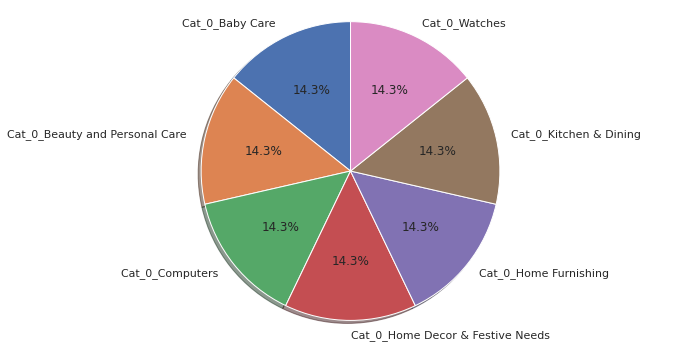

In [ ]:
y_train_images = y_train.to_frame()
y_train_images

colQualiTest = "Cat_0"
df = y_train_images

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

ohe = ohc.fit_transform(df[colQualiTest].values.reshape(-1,1)).toarray()
results = pd.DataFrame(ohe, columns = [colQualiTest +"_"+ str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )], index = df.index)
results = results.replace(0, np.nan)
labels = results.columns.to_list()
sizes = results.count().to_list()

fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


results = results.replace(np.nan, 0)
y_train_images = results

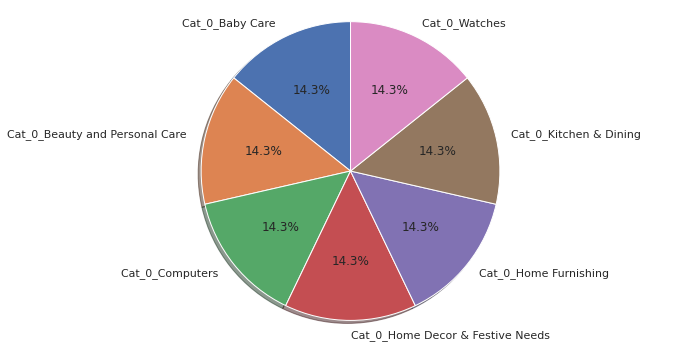

In [ ]:
y_test_images = y_test.to_frame()
y_test_images

colQualiTest = "Cat_0"
df = y_test_images

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

ohe = ohc.fit_transform(df[colQualiTest].values.reshape(-1,1)).toarray()
results = pd.DataFrame(ohe, columns = [colQualiTest +"_"+ str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )], index = df.index)
results = results.replace(0, np.nan)
labels = results.columns.to_list()
sizes = results.count().to_list()

fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


results = results.replace(np.nan, 0)
y_test_images = results

# pre-processing supervisee

## Numerical pipeline pre-processing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numerical_pipeline = Pipeline([
    ('scaler_num' , StandardScaler())
])


## Categorical pipeline pre-processing

### Text pre-processing

#### to_list : prepare les données pour tf-idf ou Word2Vec

In [ ]:
def to_list(df):
    return(df[corpus_col].tolist())

#### Word2Vec perso  avec fit et transform

Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire. Il y a probablement des fonctions déjà prêtes à l’emploi mais la documentation de gensim n’était pas assez explicite. 

bib : article _"Efficient Estimation of Word Representations in Vector Space"_
puis celui-ci _"Distributed Representations of Words and Phrases and their Compositionality"_.

In [ ]:
from gensim.models import word2vec
# ~ .fit()

def extract_sentence(corpus_list) : 
    sentences = []
    for sentence in corpus_list : 
        preproc = my_cool_preprocessor(sentence).split()

        preproc = [e for e in preproc if e not in sw]

        sentences.append(preproc)
    return sentences

def word2vec_fit(X, size_text) : 
    
    model = word2vec.Word2Vec(extract_sentence(X), size=size_text)
    return model
# ---------------------------
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, size_text = 300):
# ~ fit 
    model = word2vec_fit(X, size_text)
# ~ transform
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats
   
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


class word2vec_transf(BaseEstimator, TransformerMixin):
    """Custom scaling transformer"""
    def __init__(self, size_text=300):
        self.size_text = size_text

    def fit(self, X, y=0):
        return self

    def transform(self, X, y=0):
        return word2vec_features(X, size_text=self.size_text)
    
    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

switch_text_pip = Pipeline([
    ('to_list' , FunctionTransformer(to_list)),
    ('switch', FunctionTransformer(word2vec_features))
])
categorical_pipeline = switch_text_pip
result_word2vec = categorical_pipeline.fit_transform(X_train)
print(np.shape(result_word2vec))
print(type(result_word2vec))
result_word2vec

#### bert

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 4.5MB/s 
     |████████████████████████████████| 778kB 12.2MB/s 
     |████████████████████████████████| 1.1MB 22.2MB/s 
     |████████████████████████████████| 3.0MB 40.2MB/s 
     |████████████████████████████████| 890kB 47.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.0-cp36-none-any.whl size=86756 sha256=6a4a17a0c4199d6578a87e96e391316b1ac987fea9688d078f5ee1609aecbe55
  Stored in directory: /root/.cache/pip/wheels/b8/23/85/85d6a9a6c68f0625a1ecdaad903bb0a78df058c10cf74f9de4
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=2be7caf07a9457c828cf86b301cd0a7d82259712870cc435c39d4a647b30f957
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
def bert_transf_func(sentences) : 
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    return np.array(model.encode(sentences))

100%|██████████| 405M/405M [00:06<00:00, 60.1MB/s]


#### switch initialisé avec TF-IDF ou Word2vec

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer


switch_text_pip = Pipeline([
    ('to_list' , FunctionTransformer(to_list)),
    ('switch', TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw))
])
formal_tf_idf = switch_text_pip.fit_transform(X_train)

### categorical_pipeline finale

In [ ]:
categorical_pipeline = switch_text_pip

## Compil categ et numerical dans make_column_transformer

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num_col', numerical_pipeline,numerical_features),
    ('cat_col', categorical_pipeline,categorical_features)])

# Classification avec les descriptions

## Test modèles de classifnavec tf-idf

### construction param_model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_grid = [MultinomialNB()]  

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


C_LinearSVC_grid = np.logspace(-6, -2, 5)
tol_LinearSVC_grid =  np.logspace(-5, 2, 5)

def model_LinearSVC_gen(model_grid, C_LinearSVC, tol_LinearSVC) : 
    for C_i in C_LinearSVC : 
        for tol_j in tol_LinearSVC : 
            model_grid.append(SVC(kernel='linear',probability=True, C=C_i, tol=tol_j))
    return model_grid


model_LinearSVC_gen(model_grid, C_LinearSVC_grid, tol_LinearSVC_grid)


[MultinomialNB(),
 SVC(C=1e-06, kernel='linear', probability=True, tol=1e-05),
 SVC(C=1e-06, kernel='linear', probability=True, tol=0.0005623413251903491),
 SVC(C=1e-06, kernel='linear', probability=True, tol=0.03162277660168379),
 SVC(C=1e-06, kernel='linear', probability=True, tol=1.7782794100389228),
 SVC(C=1e-06, kernel='linear', probability=True, tol=100.0),
 SVC(C=1e-05, kernel='linear', probability=True, tol=1e-05),
 SVC(C=1e-05, kernel='linear', probability=True, tol=0.0005623413251903491),
 SVC(C=1e-05, kernel='linear', probability=True, tol=0.03162277660168379),
 SVC(C=1e-05, kernel='linear', probability=True, tol=1.7782794100389228),
 SVC(C=1e-05, kernel='linear', probability=True, tol=100.0),
 SVC(C=0.0001, kernel='linear', probability=True, tol=1e-05),
 SVC(C=0.0001, kernel='linear', probability=True, tol=0.0005623413251903491),
 SVC(C=0.0001, kernel='linear', probability=True, tol=0.03162277660168379),
 SVC(C=0.0001, kernel='linear', probability=True, tol=1.77827941003892

### grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

score = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr" ]

model = Pipeline([
    ('preprocessing', preprocessor),
#     ("parameters", parametre à tester associé à la liste de modele )
    ('model', MultinomialNB()),
#     ('modelRF', RandomForestClassifier()),
#     ('modelSVC', SVC())
])

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

params = {
    "preprocessing__cat_col__switch": [
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw),
#         word2vec_transf(size_text=50), 
#         word2vec_transf(size_text=200), 
#         word2vec_transf(size_text=500), 
#         word2vec_transf(size_text=1000)
    ],
    "model": model_grid
}

grid = GridSearchCV(model, param_grid=params, scoring=score, cv=cv, refit="accuracy")

grid.fit(X_train,y_train)


C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with yo

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and be

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with yo

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_col',
                                                                         Pipeline(steps=[('scaler_num',
                                                                                          StandardScaler())]),
                                                                         []),
                                                                        ('cat_col',
                                                                         Pipeline(steps=[('to_list',
                                                                                          FunctionTransformer(func=<function to_list at 0x0000018C2F8E0A60>)),
                                                                                         ('switch',...
      

In [ ]:

def get_name(text) : 
    return re.search("(^\w*)", str(text)).group(0).lower()
result = []

for idparam, param in enumerate(grid.cv_results_["params"]) : 
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("accuracy")    
    res.append(grid.cv_results_["mean_test_accuracy"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("f1_weighted")    
    res.append(grid.cv_results_["mean_test_f1_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("precision_weighted")    
    res.append(grid.cv_results_["mean_test_precision_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("recall_weighted")    
    res.append(grid.cv_results_["mean_test_recall_weighted"][idparam])
    result.append(res)
    
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("auc_ovr_weighted")    
    res.append(grid.cv_results_["mean_test_roc_auc_ovr"][idparam])
    result.append(res)
    
    
    


### Résultats

In [ ]:
df["model"]

In [ ]:
df = pd.read_csv("text_model.csv", sep='\t')
rf = df.loc[df["model"] == "randomforestclassifier"]
multib = df.loc[df["model"] == "multinomialnb"]

rf["type_score_max"] = rf.groupby(['type_score'])['score'].transform('max')
multib["type_score_max"] = multib.groupby(['type_score'])['score'].transform('max')
multib
# datatest["payment_type_MeanSeqPayment"]= datatest.groupby(['payment_type'])['payment_sequential'].transform('mean')
# data["payment_type_MeanSeqPayment"] = datatest["payment_type_MeanSeqPayment"]

In [ ]:
df = pd.DataFrame(result, columns=["id", "model", "preprocessing", "type_score", "score"])
sns.barplot(x="model", y="score",hue="type_score", data=df)

In [ ]:
df.to_csv('text_model.csv', sep='\t', encoding='utf-8')

Modèle retenu : classification Naive Bayes

## test preprocessing 

In [ ]:
from sklearn.model_selection import GridSearchCV
model_RF = []

RF_n_estimators = [100, 300]
RF_random_state = [42]
RF_max_depth = [5,25,50]
RF_min_samples_split = [2,5,10]

def model_RandomForestClassifier_gen(model_grid, RF_n_estimators_tab,
                                     RF_random_state_tab,
                                     RF_max_depth_tab,
                                     RF_min_samples_split_tab) : 
    for n_i in RF_n_estimators_tab : 
        for rs_j in RF_random_state_tab : 
            for md_k in RF_max_depth_tab : 
                for ms_l in RF_min_samples_split_tab : 
                    model_grid.append(RandomForestClassifier(
                        n_estimators = n_i,
                        random_state = rs_j,
                        max_depth = md_k,
                        min_samples_split = ms_l
                    ))
    return model_grid

model_RandomForestClassifier_gen(model_RF,RF_n_estimators,
                                     RF_random_state,
                                     RF_max_depth,
                                     RF_min_samples_split)
                                

[RandomForestClassifier(max_depth=5, random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42),
 RandomForestClassifier(max_depth=25, random_state=42),
 RandomForestClassifier(max_depth=25, min_samples_split=5, random_state=42),
 RandomForestClassifier(max_depth=25, min_samples_split=10, random_state=42),
 RandomForestClassifier(max_depth=50, random_state=42),
 RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=42),
 RandomForestClassifier(max_depth=50, min_samples_split=10, random_state=42),
 RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                        random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=300,
                        random_state=42),
 RandomForestClassifier(max_depth=25, n_estimators=300, rand

### grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

score = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr" ]

model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', MultinomialNB())
])

model.get_params().keys()

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

params = {
    "preprocessing__cat_col__switch": [
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 100),
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 1000),
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 2500),
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw),
        FunctionTransformer(bert_transf_func),
#         word2vec_transf(size_text = 50), 
#         word2vec_transf(size_text = 100), 
#         word2vec_transf(size_text = 250), 
#         word2vec_transf(size_text = 1000)
    ],
    "model": model_RF
#     MultinomialNB() ne gère pas les valeurs négative
}

grid = GridSearchCV(model, param_grid=params, scoring=score, cv=cv, refit="accuracy")

grid.fit(X_train,y_train)

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warn

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_col',
                                                                         Pipeline(steps=[('scaler_num',
                                                                                          StandardScaler())]),
                                                                         []),
                                                                        ('cat_col',
                                                                         Pipeline(steps=[('to_list',
                                                                                          FunctionTransformer(func=<function to_list at 0x000001C600FFE5E0>)),
                                                                                         ('switch',...
      

In [ ]:
score = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr" ]

model_ML = RandomForestClassifier()

model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])
# print(model.get_params().keys())
# print(model)


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


# params = {}
params = {
    "estimator__preprocessing__cat_col__switch": [
        TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 100),
#         TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 1000),
#         TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw, max_features = 2500),
#         TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw),
#          FunctionTransformer(bert_transf_func)
#         word2vec_transf(size_text = 50), 
#         word2vec_transf(size_text = 100), 
#         word2vec_transf(size_text = 250), 
#         word2vec_transf(size_text = 1000)
    ],
#     "estimator__model__n_estimators" : [100, 300],
#     "estimator__model__max_depth" : [5,25, None],
#      "estimator__randomforestclassifier__min_samples_split" : [2],
#     "model": [RandomForestClassifier(max_depth=5, random_state=0)]
#     MultinomialNB() ne gère pas les valeurs négative
}

grid = GridSearchCV(model, param_grid=params, scoring=score, cv=cv, refit="accuracy")

print("pipe GridSearchCV", model)

grid.fit(X_train,y_train)


In [ ]:
result = []

for idparam, param in enumerate(grid.cv_results_["params"]) : 
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("accuracy")    
    res.append(grid.cv_results_["mean_test_accuracy"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("f1_weighted")    
    res.append(grid.cv_results_["mean_test_f1_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("precision_weighted")    
    res.append(grid.cv_results_["mean_test_precision_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("recall_weighted")    
    res.append(grid.cv_results_["mean_test_recall_weighted"][idparam])
    result.append(res)
    
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("auc_ovr_weighted")    
    res.append(grid.cv_results_["mean_test_roc_auc_ovr"][idparam])
    result.append(res)

In [ ]:
df = pd.DataFrame(result, columns=["id", "model", "preprocessing", "type_score", "score"])
df

### Résultats

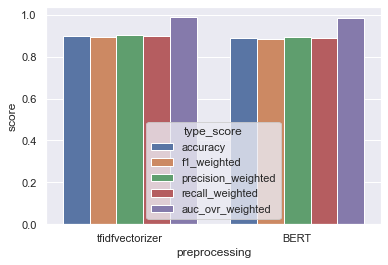

In [8]:

df = pd.read_csv("text_train_BERT_tfidf.csv", sep='\t')
# df = pd.DataFrame(result, columns=["id", "model", "preprocessing", "type_score", "score"])
sns.barplot(x="preprocessing", y="score",hue="type_score", data=df)

In [ ]:
df = pd.DataFrame(result, columns=["id", "model", "preprocessing", "type_score", "score"])
sns.barplot(x="model", y="score",hue="type_score", data=df)

In [ ]:
df.to_csv("text_preproc.csv", sep='\t', encoding='utf-8')

## évaluation modele test final sur les données test 

### Score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sentence_transformers import SentenceTransformer
def bert_transf_func(sentences) : 
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    return np.array(model.encode(sentences))

In [ ]:
X_train["description"]

799    Buy Rajrang Animal Cushions Cover at Rs. 984 a...
324    Buy Huawei WS331c -300 Mbps Wireless Range Ext...
173    Rockmantra Water Fire Ceramic Mug (5.5 l)\r\n ...
391    Buy Asus DSL-N10_C1 only for Rs. 1700 from Fli...
670    Buy MH MDF Photo Frame for Rs.899 online. MH M...
                             ...                        
228    Buy Lal Haveli Rajasthani Handcrafted Decorati...
924    Flipkart.com: Buy Elfani Brilliance Lip Color ...
95     Buy Exotic India Blessing Buddha Showpiece  - ...
800    Lapguard SONY VAIO VGN-NW270DB_90 90 Adapter (...
161    Buy Prithish Aries Black Ceramic Mug for Rs.27...
Name: description, Length: 840, dtype: object

In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
model.encode(X_train["description"])

In [ ]:
bert_transf_func(X_train)

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from sentence_transformers import SentenceTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
numerical_pipeline = Pipeline([
    ('scaler_num' , StandardScaler())
])


def bert_transf_func(sentences) : 
    model = SentenceTransformer('bert-base-nli-mean-tokens')

score = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr" ]

# switch_text_pip = FunctionTransformer(bert_transf_func)

# categorical_pipeline = switch_text_pip

# preprocessor = ColumnTransformer(transformers=[
#     ('num_col', numerical_pipeline,numerical_features),
#     ('cat_col', categorical_pipeline,categorical_features)])

model = Pipeline([
    ('preprocessing', FunctionTransformer(bert_transf_func)),
    ('model', RandomForestClassifier())
])

model.fit(X_train,y_train)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

ohe = ohc.fit_transform(df[colQualiTest].values.reshape(-1,1)).toarray()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test)
y_true = y_test

score_test = []

score_test.append(["accuracy_score", accuracy_score(y_true, y_pred)])
score_test.append(["f1_score", f1_score(y_true, y_pred, average="weighted")])
score_test.append(["precision_score", precision_score(y_true, y_pred, average="weighted")])
score_test.append(["recall_score", recall_score(y_true, y_pred, average="weighted")])
# roc_auc_score(y_true, y_pred, multi_class="ovr", average="weighted" )
df = pd.DataFrame(score_test, columns=["type_score", "score"])

sns.barplot(x="type_score", y="score", data=df)

In [ ]:
df.to_csv("text_final_text.csv", sep='\t', encoding='utf-8')

In [ ]:
text_result = pd.read_csv("text_model_prepro.csv", sep='\t')

In [ ]:
BERT_res = text_result.loc[text_result["preprocessing"] == "functiontransformer"]
BERT_res


,Unnamed: 0,id,model,preprocessing,type_score,score
20,20,4,randomforestclassifier,functiontransformer,accuracy,0.836905
21,21,4,randomforestclassifier,functiontransformer,f1_weighted,0.836131
22,22,4,randomforestclassifier,functiontransformer,precision_weighted,0.846802
23,23,4,randomforestclassifier,functiontransformer,recall_weighted,0.836905
24,24,4,randomforestclassifier,functiontransformer,auc_ovr_weighted,0.974868
...,...,...,...,...,...,...
445,445,89,randomforestclassifier,functiontransformer,accuracy,0.866667
446,446,89,randomforestclassifier,functiontransformer,f1_weighted,0.865399
447,447,89,randomforestclassifier,functiontransformer,precision_weighted,0.872932
448,448,89,randomforestclassifier,functiontransformer,recall_weighted,0.866667


### Confusion Matrix

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrix_output =multilabel_confusion_matrix(y_true, y_pred, labels = y_true.unique()) 

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# y_true = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
# y_pred = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
confusion_matrix_output = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(confusion_matrix_output, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

# __Images__ + __text__ classification

## features

### feature images

In [ ]:
# import os
# save_path = "."
# from tensorflow.keras.models import load_model
# model2 = load_model(os.path.join(save_path,"model_vgg16.h5"))

In [ ]:
data = data.rename(columns={'image': 'images'}).drop("Unnamed: 0", axis=1)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def pre_Keras(X) :
#     X_v2= pd.DataFrame(X["images"], columns = ["images"])
        
    return np.array([img_to_array(load_img(img, target_size=(224, 224)))
                               for img in X['images'].values.tolist()
                          ]).astype('float32') 


from keras.applications.vgg16 import VGG16

model = VGG16() 

from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model
import tensorflow as tf

from sklearn.pipeline import Pipeline

model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

all_set = data.copy()
all_set["images"]  =    "Images/"+ data["images"]


X_test_preimg_Keras = pre_Keras(all_set)

vgg16_feature = model.predict(X_test_preimg_Keras)

vgg16_feature_list = []
for vgg in vgg16_feature : 
    vgg16_feature_np = np.array(vgg)
    vgg16_feature_list.append(vgg16_feature_np.flatten())
np.shape(vgg16_feature_list)


Using TensorFlow backend.


58892288/58889256 [==============================] - 3s 0us/step


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(1050, 25088)

In [ ]:
# vgg16_feature_list_load = np.load('vgg16_feature_list.npy')
vgg16_feature_list_load = vgg16_feature_list

In [ ]:
np.shape(vgg16_feature_list_load)

(1050, 25088)

In [ ]:
vgg16_feature_list_load[0]

In [ ]:
np.linalg.norm(vgg16_feature_list_load[0])

In [ ]:
np.linalg.norm(vgg16_feature_list_load[900])

### features text

In [ ]:
# from sentence_transformers import SentenceTransformer
# def bert_transf_func(sentences) : 
#     model = SentenceTransformer('bert-base-nli-mean-tokens')
#     return np.array(model.encode(sentences))

In [ ]:
# feature_bert =  bert_transf_func(data["description"])

In [ ]:
# np.shape(feature_bert)

In [ ]:
# np.save('feature_bert',feature_bert )

In [ ]:
feature_bert_load = np.load('feature_bert.npy')
np.shape(feature_bert_load)

(1050, 768)

## ACP

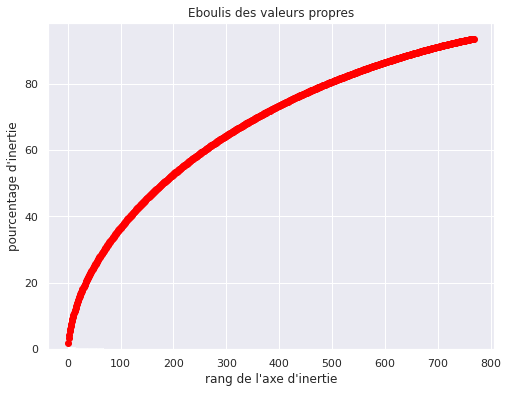

In [ ]:
from functions import *
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

n_comp = 768
pca = decomposition.PCA(n_components = n_comp)

scaler_vgg16 = StandardScaler()
X_Std=scaler_vgg16.fit_transform(vgg16_feature_list_load)
# X_train_noStar_std = preprocessor.fit_transform(X_train_noStar)

pca.fit(X_Std)

fig, ax = plt.subplots(1, figsize=(8, 6))

display_scree_plot(pca)

In [ ]:
vgg16_feature_list_pca = pca.transform(X_Std)


## concatenation

In [ ]:
data_train_full = np.concatenate((feature_bert_load,vgg16_feature_list_pca), axis=1)

In [ ]:
scaler_full = StandardScaler()
data_train_full_Std=scaler_full.fit_transform(data_train_full)

In [ ]:
data_train_full_Std

array([[-2.08362882,  0.02872152, -0.57476543, ..., -0.02150953,
         0.1271972 ,  0.05514695],
       [-0.18272425,  0.20837925,  0.12813718, ...,  0.79760649,
        -0.33115215, -0.32594397],
       [-1.27771158, -1.65107664, -1.08898439, ..., -0.17072463,
         0.17617414,  0.58569534],
       ...,
       [ 0.44877407,  0.15129073,  0.36637122, ...,  0.01651737,
         0.05733475,  0.08673063],
       [ 0.10264706,  0.23339914,  0.12732335, ..., -0.11906622,
         0.43033937,  0.50236425],
       [ 0.01561907, -0.08989507, -0.10340212, ..., -0.35389117,
         0.56029768, -1.23171549]])

In [ ]:
X_train_full = data_train_full_Std[X_train.index]
X_test_full = data_train_full_Std[X_test.index]

## model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

score = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr" ]

model = RandomForestClassifier()

print(model.get_params().keys())

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

params = {
    "n_estimators" : [1000],
    "max_depth" : [2,10, None],
    "min_samples_split":[2, 5,10], 
    "max_features" : ["auto", "log2", 0.3] 
}

grid = GridSearchCV(model, param_grid=params, scoring=score, cv=cv, refit="accuracy")

grid.fit(X_train_full,y_train)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2

In [ ]:
def get_name(text) : 
    return re.search("(^\w*)", str(text)).group(0).lower()

result = []

for idparam, param in enumerate(grid.cv_results_["params"]) : 
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("accuracy")    
    res.append(grid.cv_results_["mean_test_accuracy"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("f1_weighted")    
    res.append(grid.cv_results_["mean_test_f1_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("precision_weighted")    
    res.append(grid.cv_results_["mean_test_precision_weighted"][idparam])
    result.append(res)
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("recall_weighted")    
    res.append(grid.cv_results_["mean_test_recall_weighted"][idparam])
    result.append(res)
    
    
    res = []
    res.append(idparam)
    for key, value in param.items():
        res.append(get_name(value))
    res.append("auc_ovr_weighted")    
    res.append(grid.cv_results_["mean_test_roc_auc_ovr"][idparam])
    result.append(res)

In [ ]:
col = []
for key, value in param.items():
    col.append(key)
col = ["id"] +  col + ["type_score", "score"]
col

['id',
 'max_depth',
 'max_features',
 'min_samples_split',
 'n_estimators',
 'type_score',
 'score']

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

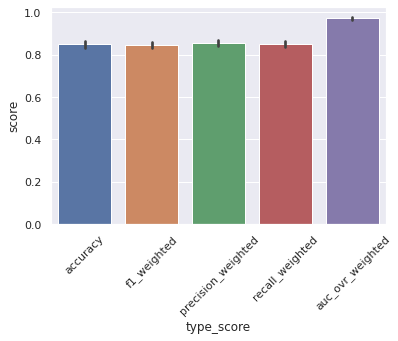

In [ ]:
df = pd.DataFrame(result, columns=col)

sns.barplot(x="type_score", y="score", data=df)

plt.xticks(rotation=45)

In [ ]:
accuracy_max = df.loc[df["type_score"] == "accuracy"]["score"].max()
f1_max = df.loc[df["type_score"] == "f1_weighted"]["score"].max()
precision_max = df.loc[df["type_score"] == "precision_weighted"]["score"].max()
recall_max = df.loc[df["type_score"] == "recall_weighted"]["score"].max()
auc_ovr_max = df.loc[df["type_score"] == "auc_ovr_weighted"]["score"].max()
print("accuracy_max : {}\n f1_max : {}\n precision_max : {}\n recall_max : {}\n auc_ovr_max : {}\n ".format(
    accuracy_max, f1_max, precision_max, recall_max, auc_ovr_max
))

accuracy_max : 0.8857142857142858
 f1_max : 0.8846035741119701
 precision_max : 0.8910218068278745
 recall_max : 0.8857142857142858
 auc_ovr_max : 0.9869543650793652
 


In [3]:
col = ['id',
 'max_depth',
 'max_features',
 'min_samples_split',
 'n_estimators',
 'type_score',
 'score']

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

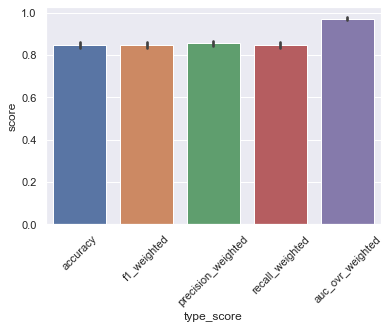

In [6]:
df = pd.DataFrame(result, columns=col)

sns.barplot(x="type_score", y="score", data=df)

plt.xticks(rotation=45)

In [7]:
accuracy_max = df.loc[df["type_score"] == "accuracy"]["score"].max()
f1_max = df.loc[df["type_score"] == "f1_weighted"]["score"].max()
precision_max = df.loc[df["type_score"] == "precision_weighted"]["score"].max()
recall_max = df.loc[df["type_score"] == "recall_weighted"]["score"].max()
auc_ovr_max = df.loc[df["type_score"] == "auc_ovr_weighted"]["score"].max()
print("accuracy_max : {}\n f1_max : {}\n precision_max : {}\n recall_max : {}\n auc_ovr_max : {}\n ".format(
    accuracy_max, f1_max, precision_max, recall_max, auc_ovr_max
))

accuracy_max : 0.8833333333333332
 f1_max : 0.8818912162190312
 precision_max : 0.8870614903811351
 recall_max : 0.8833333333333332
 auc_ovr_max : 0.98671875
 


## TEST

In [ ]:
y_test_images

,Cat_0_Baby Care,Cat_0_Beauty and Personal Care,Cat_0_Computers,Cat_0_Home Decor & Festive Needs,Cat_0_Home Furnishing,Cat_0_Kitchen & Dining,Cat_0_Watches
647,1.0,0.0,0.0,0.0,0.0,0.0,0.0
342,0.0,1.0,0.0,0.0,0.0,0.0,0.0
895,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56,0.0,1.0,0.0,0.0,0.0,0.0,0.0
386,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
102,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0,1.0,0.0,0.0
672,1.0,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

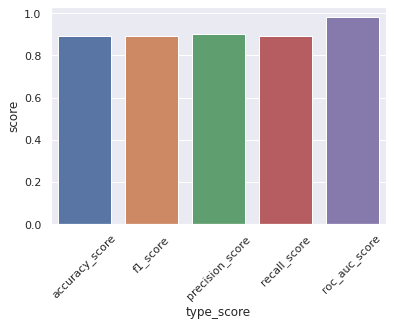

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

y_pred = grid.predict(X_test_full)
y_true = y_test

y_pred_proba = grid.predict_proba(X_test_full)


score_test = []

score_test.append(["accuracy_score", accuracy_score(y_true, y_pred)])
score_test.append(["f1_score", f1_score(y_true, y_pred, average="weighted")])
score_test.append(["precision_score", precision_score(y_true, y_pred, average="weighted")])
score_test.append(["recall_score", recall_score(y_true, y_pred, average="weighted")])
score_test.append(["roc_auc_score",   roc_auc_score(y_test_images, y_pred_proba, multi_class="ovr", average="weighted" )])
df = pd.DataFrame(score_test, columns=["type_score", "score"])

sns.barplot(x="type_score", y="score", data=df)
plt.xticks(rotation=45)

# Segmentation

## __Text__

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
    
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

tfidf = TfidfVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw)
tf = CountVectorizer(preprocessor=my_cool_preprocessor, stop_words=sw)
bert = FunctionTransformer(bert_transf_func)


### TF

#### Kmeans

In [ ]:

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
    
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

corpus_list = list(data["description"].values)
prepro = tf
values_prepro = prepro.fit_transform(corpus_list)


In [ ]:

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
    
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

from sklearn import manifold
import seaborn as sns

from scipy.sparse import csr_matrix, isspmatrix

def kmeans_label(X_Std,num_clusters,stab ) : 
    cls = KMeans(n_clusters=num_clusters, random_state=stab)
    print("AVANT FIT num_clusters,stab", num_clusters,stab)
    cls.fit(X_Std)
#     print("APRES FIT num_clusters,stab", num_clusters,stab)
    lab = cls.labels_
    del cls
    return lab

def silhouette(X_Std, K_min,K_max,K_pas, max_it) : 
    silhouettes = []
    for num_clusters in range(K_min,K_max,K_pas) : 
        print("Nombre de clusters : {}".format(num_clusters))
        for stab in range(max_it) :
    #         n_init = 10
#             cls = KMeans(n_clusters=num_clusters, random_state=stab)
#             cls.fit(X_Std)
            silh = metrics.silhouette_score(X_Std, kmeans_label(X_Std,num_clusters,stab))
            silhouettes.append([num_clusters, stab, "n_init",silh])
    
    return silhouettes
    
def plot_silhouette(silhouettes) :
    
    df = pd.DataFrame(silhouettes,
                      columns=["K","random_state"    ,"n_init", "silhouettes"])

    sns.set(style="whitegrid")
    
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    ax = sns.boxplot(x="K", y="silhouettes",
                     data=df)
    
    
    idxmax = df.silhouettes.idxmax()
    score_max = df.silhouettes[idxmax]
    best_random_state = df.random_state[idxmax]
    bestCluster = df.K[idxmax]
    
    return [idxmax,score_max, best_random_state, bestCluster ]
    
    
    
    
    
def plot_TSNE(X_Std, TSNE_per, n_clusters, sample_silhouette_values, cluster_labels, silhouette_avg) : 
    
    for perplexity in TSNE_per : 

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        # ax1.set_ylim([0, len(X_Std) + (n_clusters + 1) * 10])

        y_lower = 10

        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed

        embedding = manifold.TSNE(n_components=2, perplexity=perplexity, random_state=42, init='pca')


        X_transformed = embedding.fit_transform(X_Std)

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
    
    
    
    
    
def kMeans_func(X,K_min=10,K_max=55,K_pas=5, TSNE_per=[10], norm="norm") : 
    
    if isspmatrix(X) : Xdense = X.todense()
    else : Xdense = X.copy()
        
    if norm == "stand" : 
        scaler_VW = StandardScaler()
        X_Std=scaler_VW.fit_transform(Xdense)
    else :
        X_Std=normalize(Xdense, copy=False)
    
    max_it=3

    silhouettes = silhouette(X_Std, K_min,K_max,K_pas, max_it)
    
    [idxmax,score_max, best_random_state, bestCluster ] = plot_silhouette(silhouettes)
    
    print("score_max", score_max, bestCluster)
    
    print(__doc__)

    clusterer = KMeans(n_clusters=bestCluster, random_state=best_random_state)
    cluster_labels = clusterer.fit_predict(X_Std)

    silhouette_avg = silhouette_score(X_Std, cluster_labels)
    print("For bestCluster =", bestCluster,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_Std, cluster_labels)

    plot_TSNE(X_Std, TSNE_per, bestCluster, sample_silhouette_values, cluster_labels, silhouette_avg)
    
    return cluster_labels
    

##### Kmeans sur documents

In [ ]:
kMeans_func(values_prepro,K_min=6,K_max=13,K_pas=1, norm="norm")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
dataolivetti = olivetti.data
images = olivetti.images

print(np.shape(olivetti.images))

#### visu non supervisee text 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox


# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            if i%100 == 0 : print(i)
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.2), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
# olivetti = fetch_olivetti_faces()
# targets = olivetti.target
XStd = normalize(values_prepro.todense(), copy=False)
images = img_pre_arr_load



X = XStd
tsne = manifold.TSNE(n_components=2, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

##### GaussianMixture sur documents

In [ ]:
from sklearn import mixture
n_clusters = 10
clf = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
XStd = normalize(values_prepro.todense(), copy=False)
print("avant fit mixture")
clf.fit(XStd)
print("apres fit mixture")

cluster_labels = clf.predict(XStd)
sample_silhouette_values = silhouette_samples(XStd, cluster_labels)
silhouette_avg = silhouette_score(XStd, cluster_labels)

print("silhouette_avg", silhouette_avg)
plot_TSNE(XStd, [20], n_clusters, sample_silhouette_values, cluster_labels, silhouette_avg)


##### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

XStd = normalize(values_prepro.todense(), copy=False)
db = DBSCAN(eps=1, min_samples=2).fit(XStd)

cluster_labels = db.labels_
sample_silhouette_values = silhouette_samples(XStd, cluster_labels)
silhouette_avg = silhouette_score(XStd, cluster_labels)

print("silhouette_avg", silhouette_avg)
plot_TSNE(XStd, [20], n_clusters, sample_silhouette_values, cluster_labels, silhouette_avg)



#### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

XStd = normalize(values_prepro, copy=False)

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(XStd)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10

# print("prepro.get_feature_names() : ", np.shape(prepro.get_feature_names()))
# print("lda.components_ : ", np.shape(lda.components_), np.shape(lda.components_[0]),lda.components_[0])

display_topics(lda, prepro.get_feature_names(), no_top_words)


#### NMF

##### best topics

In [ ]:

XStd = normalize(values_prepro, copy=False)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

# NMF is able to use tf-idf

feature_names = prepro.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(XStd)

no_top_words = 10
display_topics(nmf, feature_names, no_top_words)


### TF-IDF

#### Kmeans

In [ ]:

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
    
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

corpus_list = list(data["description"].values)
prepro = tfidf
values_prepro = prepro.fit_transform(corpus_list)


C:\Users\ious\miniconda3\envs\python_env\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'deliveri', 'doe', 'dure', 'featur', 'genuin', 'guarante', 'ha', 'hi', 'onc', 'onli', 'onlin', 'ourselv', 'product', 'replac', 'ship', 'specif', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


##### Kmeans sur documents

Nombre de clusters : 6
AVANT FIT num_clusters,stab 6 0
AVANT FIT num_clusters,stab 6 1
AVANT FIT num_clusters,stab 6 2
Nombre de clusters : 7
AVANT FIT num_clusters,stab 7 0
AVANT FIT num_clusters,stab 7 1
AVANT FIT num_clusters,stab 7 2
Nombre de clusters : 8
AVANT FIT num_clusters,stab 8 0
AVANT FIT num_clusters,stab 8 1
AVANT FIT num_clusters,stab 8 2
Nombre de clusters : 9
AVANT FIT num_clusters,stab 9 0
AVANT FIT num_clusters,stab 9 1
AVANT FIT num_clusters,stab 9 2
Nombre de clusters : 10
AVANT FIT num_clusters,stab 10 0
AVANT FIT num_clusters,stab 10 1
AVANT FIT num_clusters,stab 10 2
Nombre de clusters : 11
AVANT FIT num_clusters,stab 11 0
AVANT FIT num_clusters,stab 11 1
AVANT FIT num_clusters,stab 11 2
Nombre de clusters : 12
AVANT FIT num_clusters,stab 12 0
AVANT FIT num_clusters,stab 12 1
AVANT FIT num_clusters,stab 12 2
Nombre de clusters : 13
AVANT FIT num_clusters,stab 13 0
AVANT FIT num_clusters,stab 13 1
AVANT FIT num_clusters,stab 13 2
Nombre de clusters : 14
AVANT FI

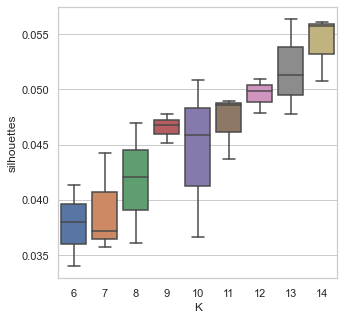

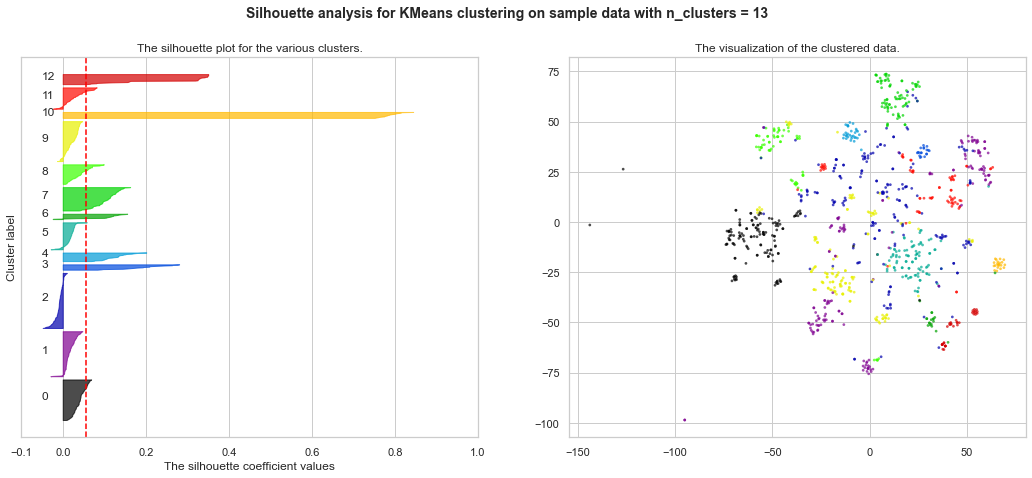

array([3, 4, 4, ..., 9, 9, 9])

In [ ]:
kMeans_func(values_prepro,K_min=6,K_max=15,K_pas=1)

#### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

XStd = normalize(values_prepro, copy=False)

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(XStd)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10

# print("prepro.get_feature_names() : ", np.shape(prepro.get_feature_names()))
# print("lda.components_ : ", np.shape(lda.components_), np.shape(lda.components_[0]),lda.components_[0])

display_topics(lda, prepro.get_feature_names(), no_top_words)


#### NMF

##### best topics

In [ ]:

XStd = normalize(values_prepro, copy=False)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

# NMF is able to use tf-idf

feature_names = prepro.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(XStd)

no_top_words = 10
display_topics(nmf, feature_names, no_top_words)


#### visu non supervisee text 

0
100
200
300
400
500
600
700
800
900
1000


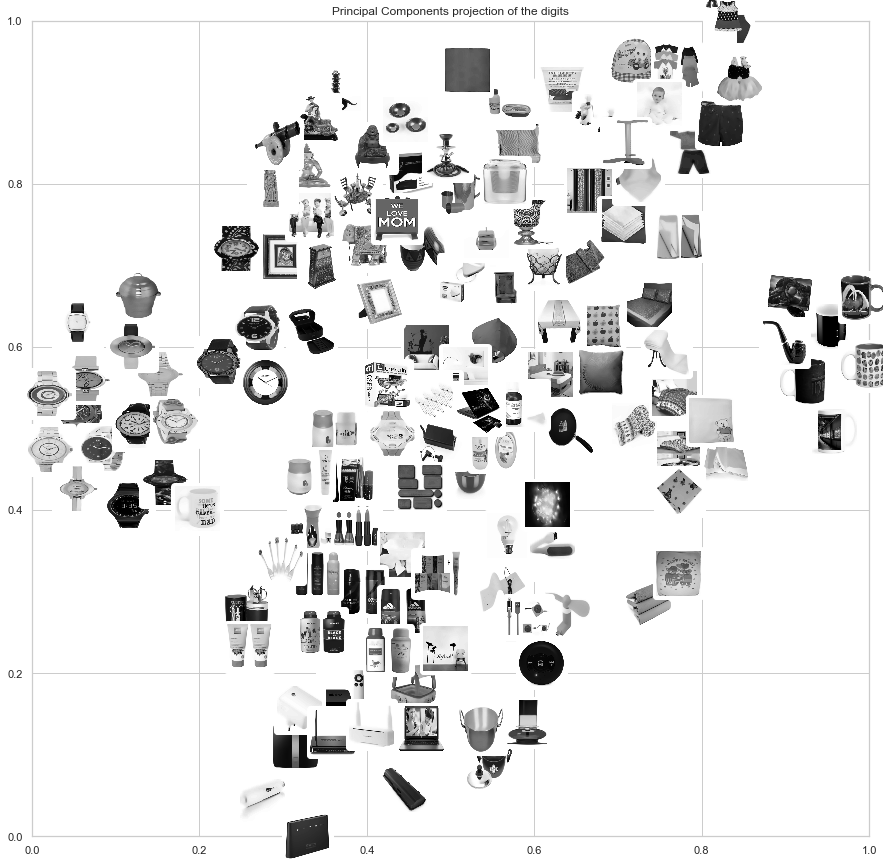

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox


# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            if i%100 == 0 : print(i)
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.2), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
# olivetti = fetch_olivetti_faces()
# targets = olivetti.target
XStd = normalize(values_prepro.todense(), copy=False)
images = img_pre_arr_load



X = XStd
tsne = manifold.TSNE(n_components=2, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

### non sup BERT

In [ ]:

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
    
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

corpus_list = list(data["description"].values)
prepro = bert
values_prepro = prepro.fit_transform(corpus_list)

Nombre de clusters : 6
AVANT FIT num_clusters,stab 6 0
AVANT FIT num_clusters,stab 6 1
AVANT FIT num_clusters,stab 6 2
Nombre de clusters : 7
AVANT FIT num_clusters,stab 7 0
AVANT FIT num_clusters,stab 7 1
AVANT FIT num_clusters,stab 7 2
Nombre de clusters : 8
AVANT FIT num_clusters,stab 8 0
AVANT FIT num_clusters,stab 8 1
AVANT FIT num_clusters,stab 8 2
Nombre de clusters : 9
AVANT FIT num_clusters,stab 9 0
AVANT FIT num_clusters,stab 9 1
AVANT FIT num_clusters,stab 9 2
Nombre de clusters : 10
AVANT FIT num_clusters,stab 10 0
AVANT FIT num_clusters,stab 10 1
AVANT FIT num_clusters,stab 10 2
Nombre de clusters : 11
AVANT FIT num_clusters,stab 11 0
AVANT FIT num_clusters,stab 11 1
AVANT FIT num_clusters,stab 11 2
Nombre de clusters : 12
AVANT FIT num_clusters,stab 12 0
AVANT FIT num_clusters,stab 12 1
AVANT FIT num_clusters,stab 12 2
Nombre de clusters : 13
AVANT FIT num_clusters,stab 13 0
AVANT FIT num_clusters,stab 13 1
AVANT FIT num_clusters,stab 13 2
Nombre de clusters : 14
AVANT FI

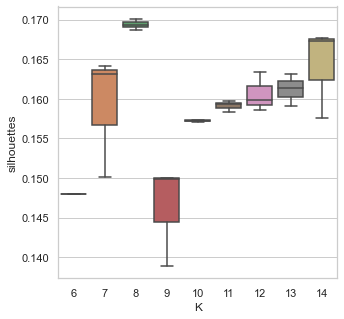

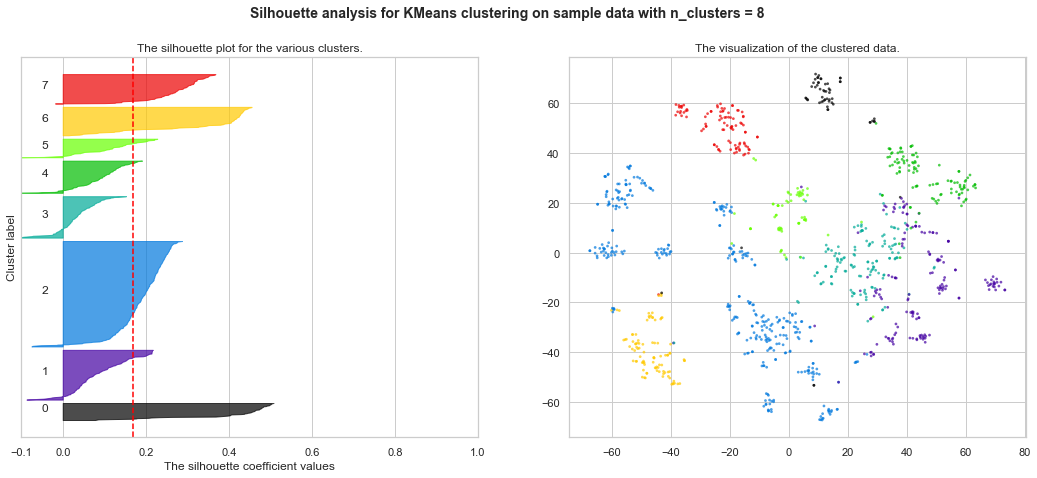

array([3, 1, 1, ..., 2, 2, 2])

In [ ]:
kMeans_func(values_prepro,K_min=6,K_max=15,K_pas=1)

#### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

XStd = normalize(values_prepro, copy=False)

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(XStd)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10

# print("prepro.get_feature_names() : ", np.shape(prepro.get_feature_names()))
# print("lda.components_ : ", np.shape(lda.components_), np.shape(lda.components_[0]),lda.components_[0])

display_topics(lda, prepro.get_feature_names(), no_top_words)


#### NMF

##### best topics

In [ ]:

XStd = normalize(values_prepro, copy=False)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

# NMF is able to use tf-idf

# feature_names = prepro.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(XStd)

no_top_words = 10
display_topics(nmf, feature_names, no_top_words)


#### visu non supervisee text 

0
100
200
300
400
500
600
700
800
900
1000


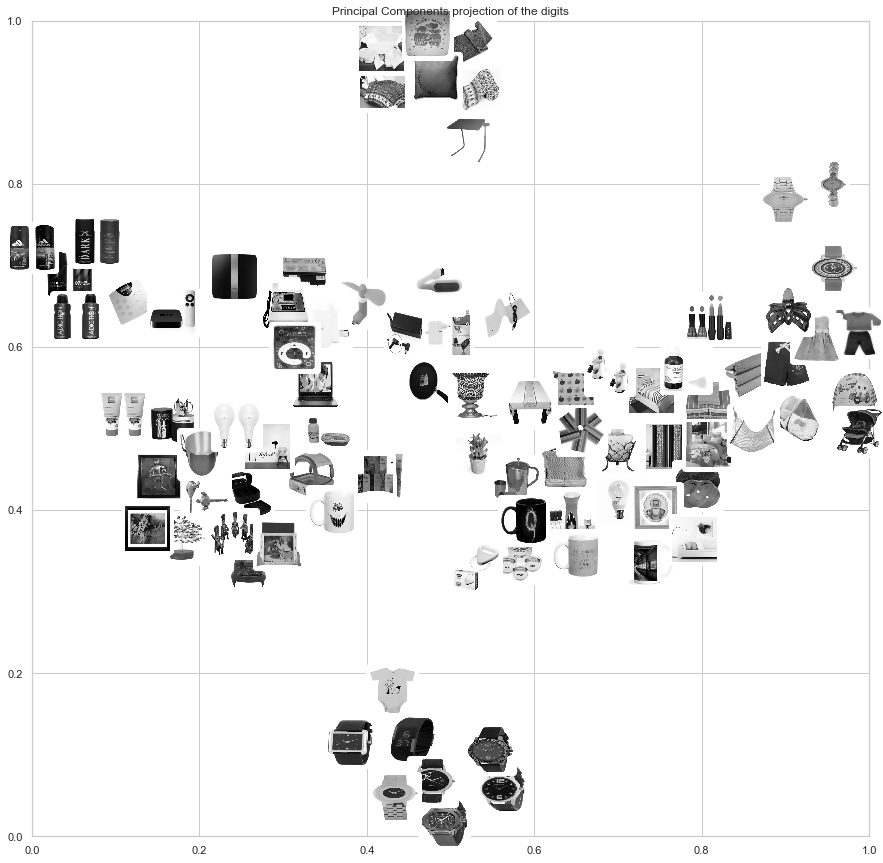

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox


# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            if i%100 == 0 : print(i)
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.2), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
# olivetti = fetch_olivetti_faces()
# targets = olivetti.target
XStd = normalize(values_prepro, copy=False)
images = img_pre_arr_load



X = XStd
tsne = manifold.TSNE(n_components=2, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

## __FULL__ segmentation

In [ ]:
values_prepro = data_train_full_Std
np.shape(values_prepro)

(1050, 1536)

Nombre de clusters : 6
AVANT FIT num_clusters,stab 6 0
AVANT FIT num_clusters,stab 6 1
AVANT FIT num_clusters,stab 6 2
Nombre de clusters : 7
AVANT FIT num_clusters,stab 7 0
AVANT FIT num_clusters,stab 7 1
AVANT FIT num_clusters,stab 7 2
Nombre de clusters : 8
AVANT FIT num_clusters,stab 8 0
AVANT FIT num_clusters,stab 8 1
AVANT FIT num_clusters,stab 8 2
Nombre de clusters : 9
AVANT FIT num_clusters,stab 9 0
AVANT FIT num_clusters,stab 9 1
AVANT FIT num_clusters,stab 9 2
Nombre de clusters : 10
AVANT FIT num_clusters,stab 10 0
AVANT FIT num_clusters,stab 10 1
AVANT FIT num_clusters,stab 10 2
Nombre de clusters : 11
AVANT FIT num_clusters,stab 11 0
AVANT FIT num_clusters,stab 11 1
AVANT FIT num_clusters,stab 11 2
Nombre de clusters : 12
AVANT FIT num_clusters,stab 12 0
AVANT FIT num_clusters,stab 12 1
AVANT FIT num_clusters,stab 12 2
Nombre de clusters : 13
AVANT FIT num_clusters,stab 13 0
AVANT FIT num_clusters,stab 13 1
AVANT FIT num_clusters,stab 13 2
Nombre de clusters : 14
AVANT FI

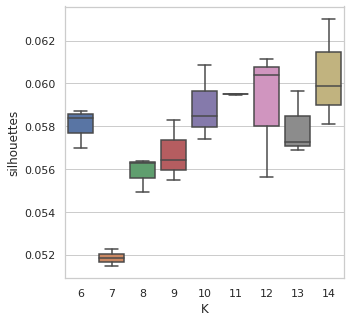

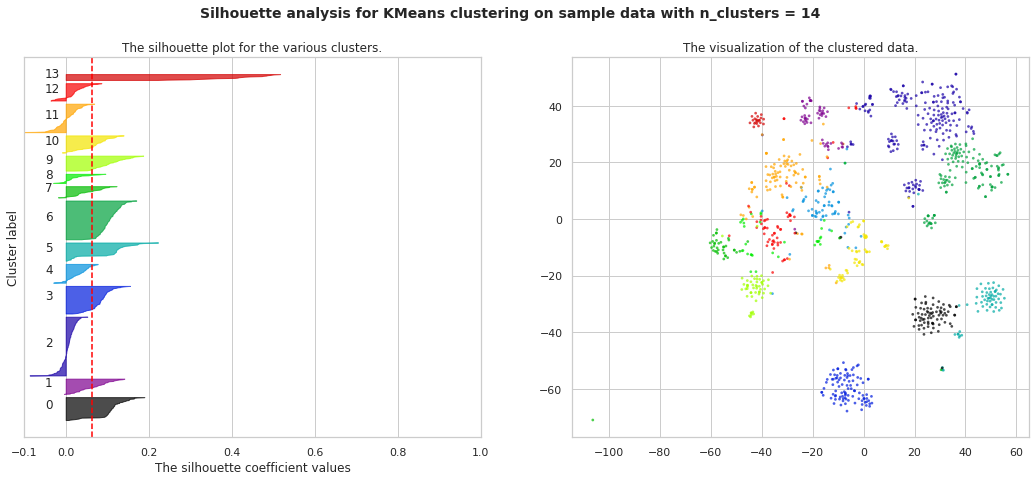

array([11, 12, 12, ...,  2,  2,  2], dtype=int32)

In [ ]:
kMeans_func(values_prepro,K_min=6,K_max=15,K_pas=1)

0
100
200
300
400
500
600
700
800
900
1000


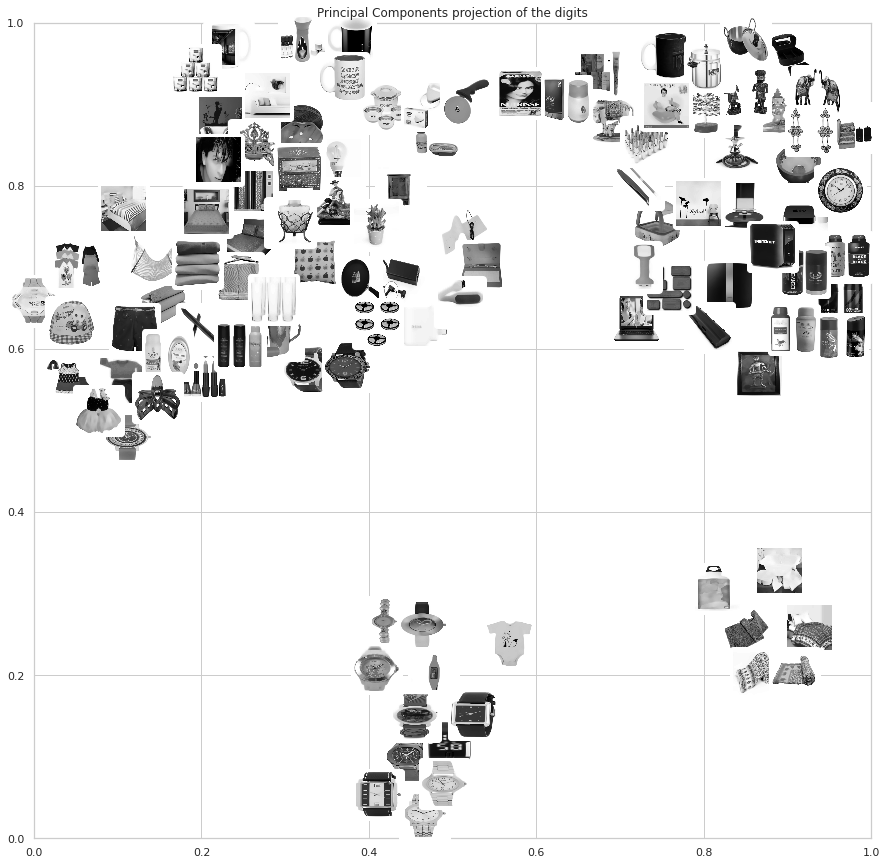

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox


# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            if i%100 == 0 : print(i)
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.2), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
# olivetti = fetch_olivetti_faces()
# targets = olivetti.target
XStd = normalize(values_prepro, copy=False)
images = img_pre_arr_load



X = XStd
tsne = manifold.TSNE(n_components=2, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()